In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
from Modes import ModeContainer
import numpy as onp
import matplotlib.pyplot as plt
import networkx as nx

# Study all available data

In [5]:
df=pd.read_csv("france_covid_data.csv")
df=df.drop("date",axis=1)
df

,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,...,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered
0,589.0,272296.0,24620.0,107.0,42622.0,2650.0,2.0,2.0,2.0,4.0,...,2556944.0,43551.0,25148369.0,34726580.0,609.0,609.0,55.0,55.0,664.0,664.0
1,1217.0,273513.0,24645.0,229.0,42851.0,2694.0,2.0,2.0,2.0,4.0,...,2559904.0,43914.0,25339091.0,35124318.0,683.0,1292.0,42.0,97.0,725.0,1389.0
2,1627.0,275140.0,24743.0,251.0,43102.0,2666.0,2.0,2.0,2.0,4.0,...,2571299.0,44298.0,25530897.0,35490439.0,384.0,1676.0,19.0,116.0,403.0,1792.0
3,1404.0,276544.0,24560.0,209.0,43311.0,2652.0,2.0,2.0,2.0,4.0,...,2597756.0,44601.0,25723942.0,35889993.0,443.0,2119.0,18.0,134.0,461.0,2253.0
4,1317.0,277861.0,24407.0,177.0,43488.0,2625.0,2.0,2.0,2.0,4.0,...,2617683.0,44852.0,25918163.0,36227201.0,440.0,2559.0,23.0,157.0,463.0,2716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,756.0,822964.0,19272.0,77.0,136447.0,1233.0,0.0,1.0,0.0,0.0,...,3558022.0,147257.0,231965820.0,272612209.0,1957.0,54446241.0,2027.0,53539427.0,3984.0,107985668.0
503,387.0,823351.0,18901.0,42.0,136489.0,1213.0,0.0,1.0,0.0,0.0,...,3558022.0,147331.0,232619554.0,272775929.0,1143.0,54447384.0,1169.0,53540596.0,2312.0,107987980.0
504,145.0,823496.0,18935.0,13.0,136502.0,1214.0,0.0,1.0,0.0,0.0,...,3558022.0,147352.0,233273381.0,272775929.0,280.0,54447664.0,279.0,53540875.0,559.0,107988539.0
505,900.0,824396.0,18742.0,94.0,136596.0,1199.0,0.0,1.0,0.0,0.0,...,3558022.0,147478.0,233928156.0,272775929.0,1178.0,54448842.0,1206.0,53542081.0,2384.0,107990923.0


In [28]:
list(df.columns)

['new_hospitalized_patients',
 'cumulative_hospitalized_patients',
 'current_hospitalized_patients',
 'new_intensive_care_patients',
 'cumulative_intensive_care_patients',
 'current_intensive_care_patients',
 'school_closing',
 'workplace_closing',
 'cancel_public_events',
 'restrictions_on_gatherings',
 'public_transport_closing',
 'stay_at_home_requirements',
 'restrictions_on_internal_movement',
 'income_support',
 'facial_coverings',
 'vaccination_policy',
 'stringency_index',
 'new_confirmed',
 'new_deceased',
 'new_recovered',
 'new_tested',
 'cumulative_confirmed',
 'cumulative_deceased',
 'cumulative_recovered',
 'cumulative_tested',
 'new_persons_vaccinated',
 'cumulative_persons_vaccinated',
 'new_persons_fully_vaccinated',
 'cumulative_persons_fully_vaccinated',
 'new_vaccine_doses_administered',
 'cumulative_vaccine_doses_administered']

In [4]:
node_names=df.columns
X=df.to_numpy()
X=(X-onp.mean(X,axis=0))/onp.std(X,axis=0)

In [5]:
modes=ModeContainer.make_container(
    X.T,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.01,'type':'pairwise','interpolatory':False,'default':True},
)

In [6]:
graph_discovery=GraphDiscoveryNew(X.T,onp.array(node_names),modes)

inspecting new_hospitalized_patients
linear kernel (using gamma=2.19e+01)
 n/(n+s)=0.49, Z=0.99
quadratic kernel (using gamma=1.15e+00)
 n/(n+s)=0.54, Z=0.96
new_hospitalized_patients has ancestors with linear kernel (n/(s+n)=0.49)
ancestors : ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered', 'cumulative_vaccine_doses_administ

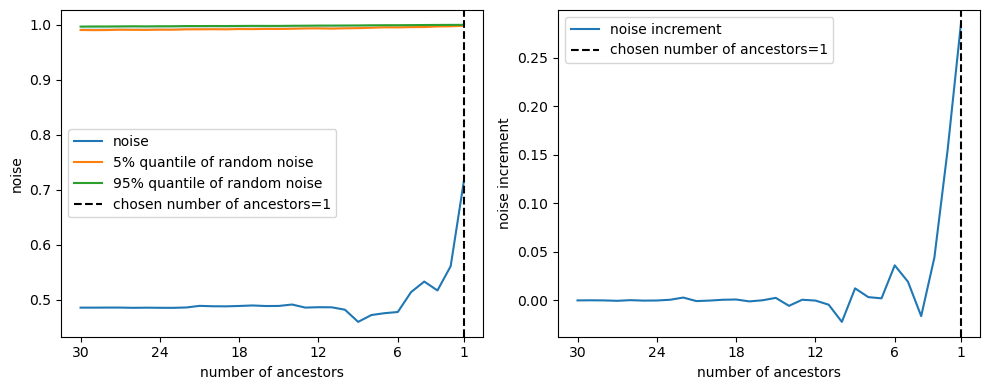

ancestors after pruning:  ['new_intensive_care_patients'] 



inspecting cumulative_hospitalized_patients
linear kernel (using gamma=4.21e-04)
 n/(n+s)=0.11, Z=1.00
quadratic kernel (using gamma=9.92e-06)
 n/(n+s)=0.40, Z=0.93
cumulative_hospitalized_patients has ancestors with linear kernel (n/(s+n)=0.11)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated',

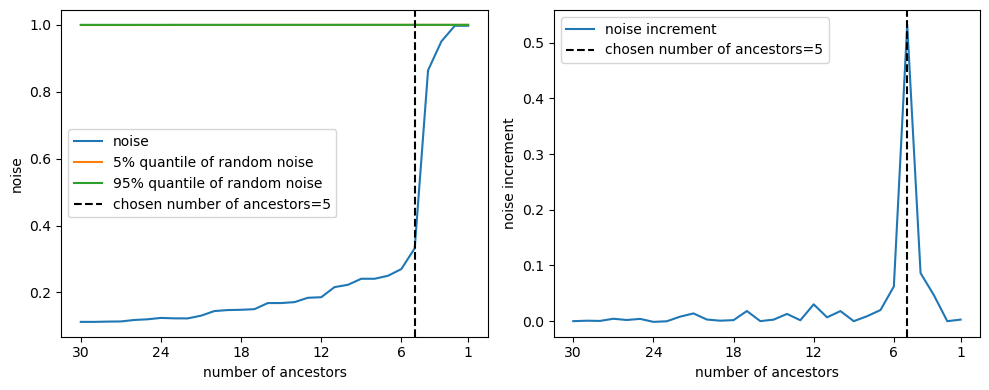

ancestors after pruning:  ['current_hospitalized_patients', 'cumulative_intensive_care_patients', 'new_recovered', 'cumulative_confirmed', 'cumulative_recovered'] 



inspecting current_hospitalized_patients
linear kernel (using gamma=1.38e-01)
 n/(n+s)=0.69, Z=0.99
quadratic kernel (using gamma=5.55e-03)
 n/(n+s)=0.52, Z=0.94
current_hospitalized_patients has ancestors with quadratic kernel (n/(s+n)=0.52)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinate

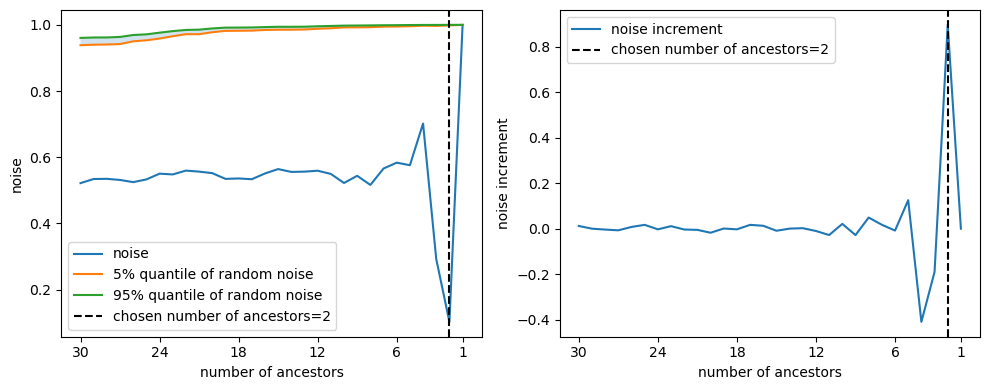

ancestors after pruning:  ['cumulative_hospitalized_patients', 'new_recovered'] 



inspecting new_intensive_care_patients
linear kernel (using gamma=2.01e+01)
 n/(n+s)=0.55, Z=0.99
quadratic kernel (using gamma=1.50e+00)
 n/(n+s)=0.59, Z=0.97
new_intensive_care_patients has ancestors with linear kernel (n/(s+n)=0.55)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cu

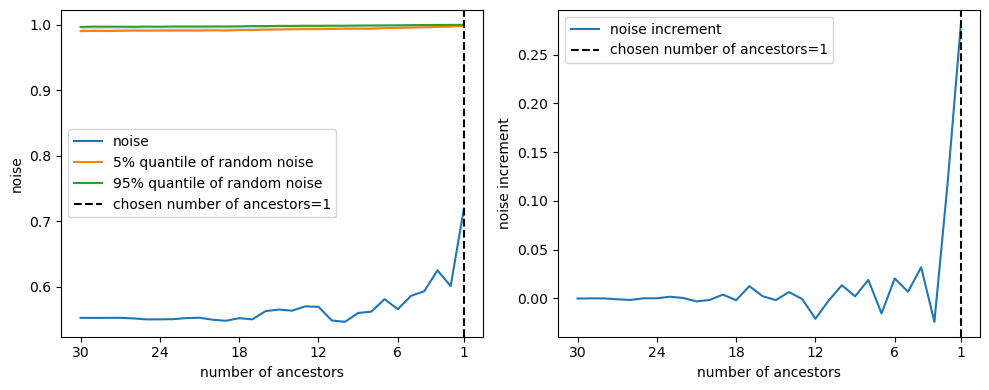

ancestors after pruning:  ['new_hospitalized_patients'] 



inspecting cumulative_intensive_care_patients
linear kernel (using gamma=2.45e-02)
 n/(n+s)=0.63, Z=1.00
quadratic kernel (using gamma=3.28e-05)
 n/(n+s)=0.48, Z=0.93
cumulative_intensive_care_patients has ancestors with quadratic kernel (n/(s+n)=0.48)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinate

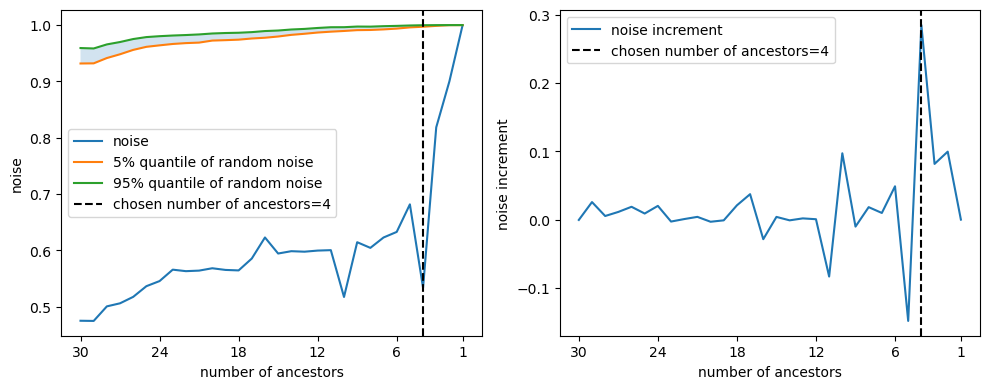

ancestors after pruning:  ['cumulative_hospitalized_patients', 'new_recovered', 'cumulative_tested', 'cumulative_persons_fully_vaccinated'] 



inspecting current_intensive_care_patients
linear kernel (using gamma=4.82e+00)
 n/(n+s)=0.57, Z=0.99
quadratic kernel (using gamma=1.42e-02)
 n/(n+s)=0.55, Z=0.94
current_intensive_care_patients has ancestors with quadratic kernel (n/(s+n)=0.55)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_p

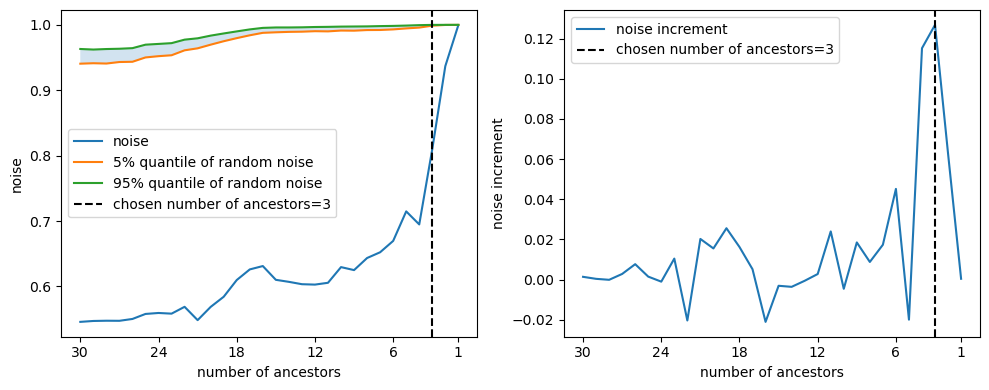

ancestors after pruning:  ['current_hospitalized_patients', 'stringency_index', 'cumulative_tested'] 



inspecting school_closing
linear kernel (using gamma=8.06e+00)
 n/(n+s)=0.64, Z=0.99
quadratic kernel (using gamma=1.42e-06)
 n/(n+s)=0.47, Z=0.93
school_closing has ancestors with quadratic kernel (n/(s+n)=0.47)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_

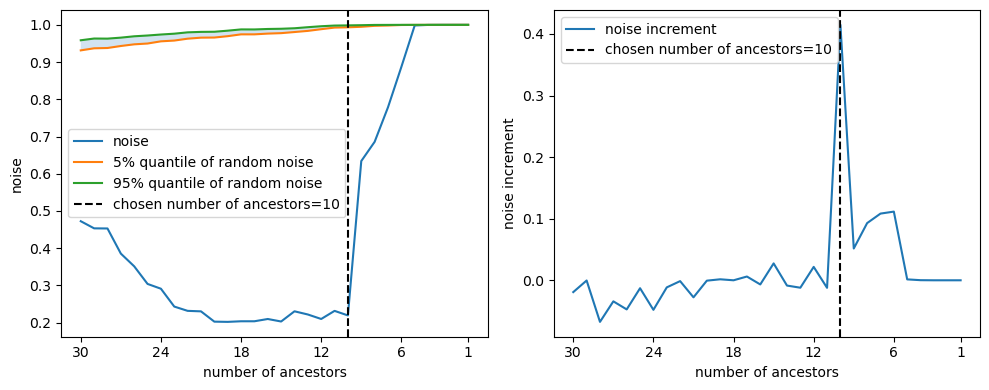

ancestors after pruning:  ['cumulative_intensive_care_patients', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'cumulative_deceased', 'cumulative_tested'] 



inspecting workplace_closing
linear kernel (using gamma=3.05e+01)
 n/(n+s)=0.75, Z=0.99
quadratic kernel (using gamma=1.80e-02)
 n/(n+s)=0.75, Z=0.94
workplace_closing has ancestors with linear kernel (n/(s+n)=0.75)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_re

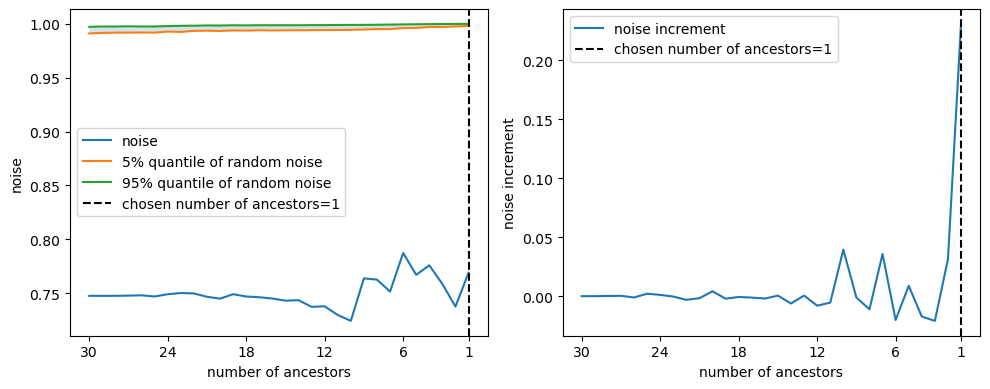

ancestors after pruning:  ['restrictions_on_gatherings'] 



inspecting cancel_public_events
linear kernel (using gamma=6.66e+00)
 n/(n+s)=0.65, Z=0.99
gamma too small for set tolerance(7.25e-12), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.01, Z=0.93
cancel_public_events has ancestors with quadratic kernel (n/(s+n)=0.01)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_dece

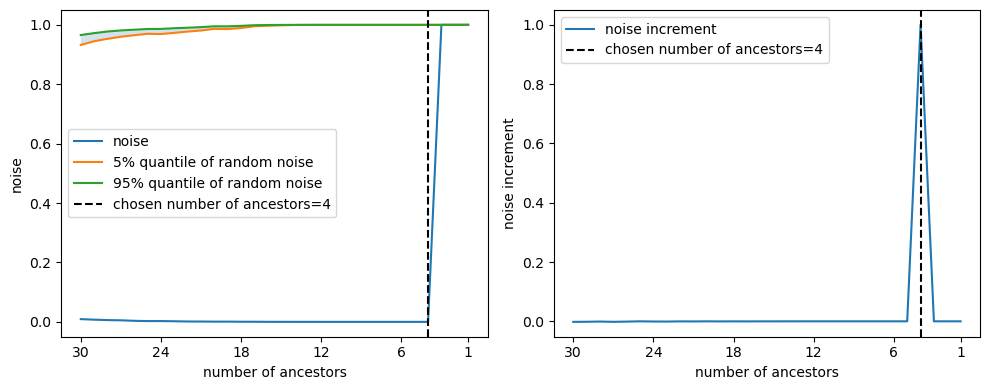

ancestors after pruning:  ['school_closing', 'workplace_closing', 'restrictions_on_gatherings', 'vaccination_policy'] 



inspecting restrictions_on_gatherings
linear kernel (using gamma=5.22e+00)
 n/(n+s)=0.72, Z=0.99
gamma too small for set tolerance(6.06e-12), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.04, Z=0.93
restrictions_on_gatherings has ancestors with quadratic kernel (n/(s+n)=0.04)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', '

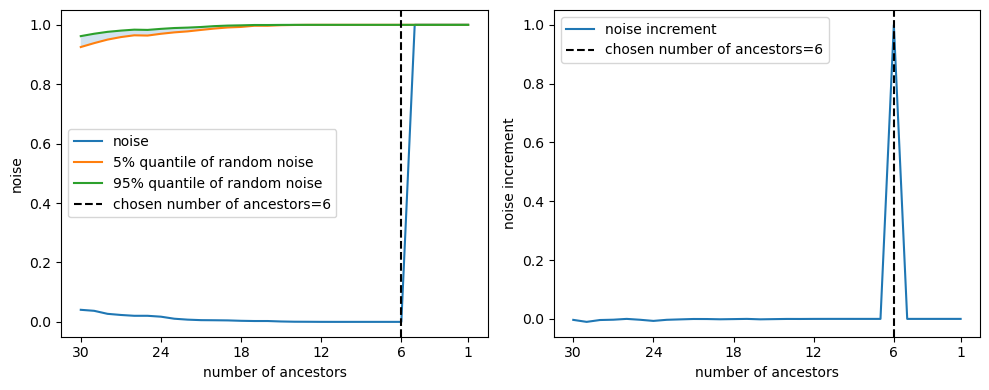

ancestors after pruning:  ['cancel_public_events', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'facial_coverings', 'stringency_index'] 



inspecting public_transport_closing
linear kernel (using gamma=1.53e+00)
 n/(n+s)=0.55, Z=0.99
gamma too small for set tolerance(1.53e-12), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.01, Z=0.93
public_transport_closing has ancestors with quadratic kernel (n/(s+n)=0.01)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'stay_at_home_requirements', 'restrictions_on_internal_move

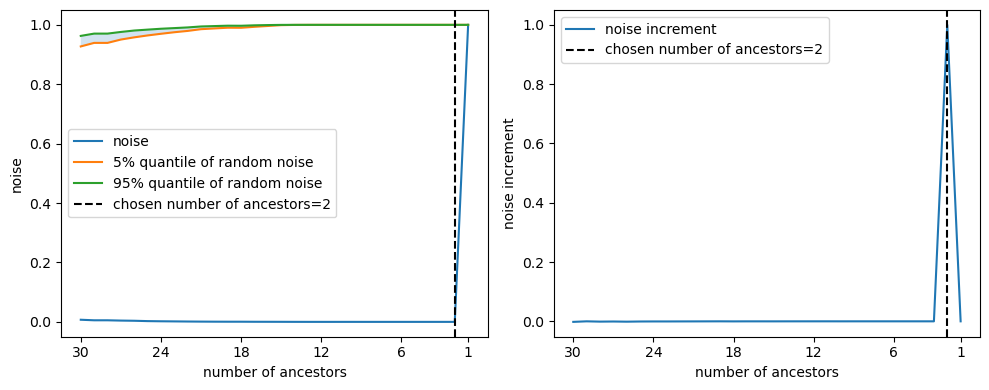

ancestors after pruning:  ['stay_at_home_requirements', 'restrictions_on_internal_movement'] 



inspecting stay_at_home_requirements
linear kernel (using gamma=4.98e+00)
 n/(n+s)=0.63, Z=0.99
gamma too small for set tolerance(1.09e-11), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=0.93
stay_at_home_requirements has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed',

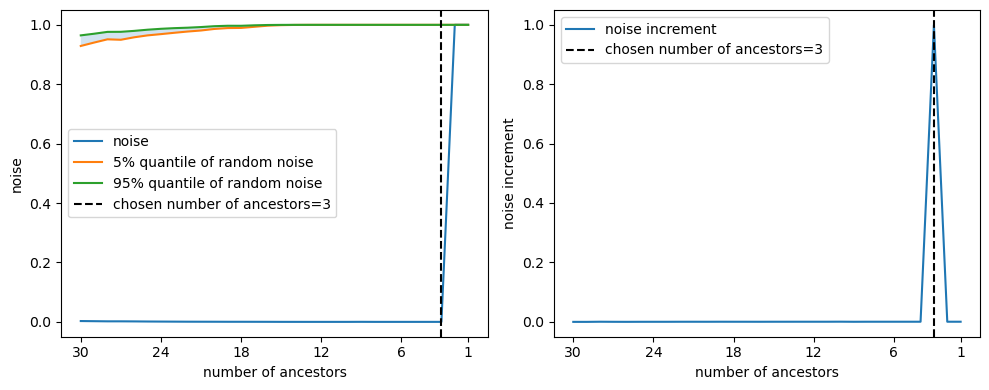

ancestors after pruning:  ['cancel_public_events', 'restrictions_on_gatherings', 'stringency_index'] 



inspecting restrictions_on_internal_movement
linear kernel (using gamma=7.20e+00)
 n/(n+s)=0.69, Z=0.99
quadratic kernel (using gamma=1.71e-05)
 n/(n+s)=0.41, Z=0.93
restrictions_on_internal_movement has ancestors with quadratic kernel (n/(s+n)=0.41)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 

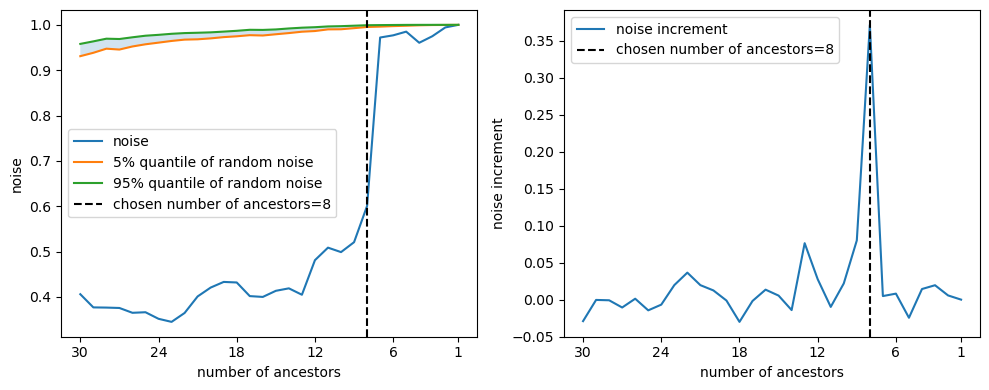

ancestors after pruning:  ['workplace_closing', 'public_transport_closing', 'stay_at_home_requirements', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'cumulative_persons_vaccinated', 'cumulative_persons_fully_vaccinated'] 



inspecting income_support
linear kernel (using gamma=5.83e+00)
 n/(n+s)=0.76, Z=0.99
gamma too small for set tolerance(2.37e-11), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.01, Z=0.93
income_support has ancestors with quadratic kernel (n/(s+n)=0.01)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'publi

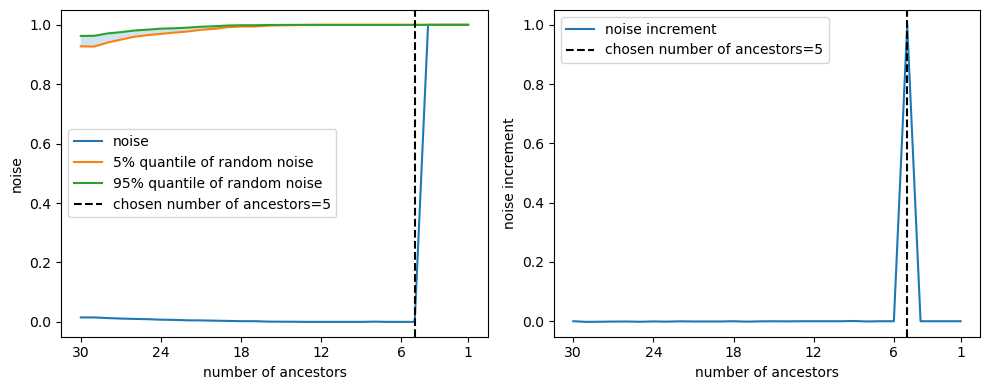

ancestors after pruning:  ['restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'facial_coverings', 'stringency_index'] 



inspecting facial_coverings
linear kernel (using gamma=3.54e+01)
 n/(n+s)=0.74, Z=0.99
quadratic kernel (using gamma=2.45e+00)
 n/(n+s)=0.76, Z=0.97
facial_coverings has ancestors with linear kernel (n/(s+n)=0.74)
ancestors : ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_p

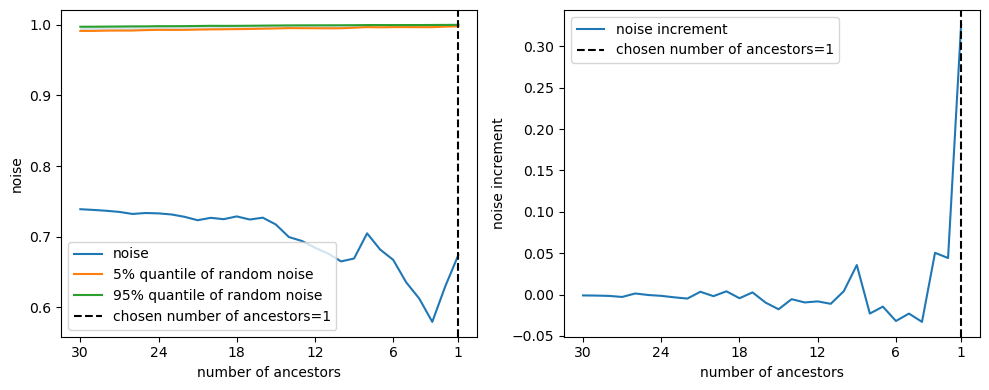

ancestors after pruning:  ['stay_at_home_requirements'] 



inspecting vaccination_policy
linear kernel (using gamma=1.67e+01)
 n/(n+s)=0.58, Z=0.99
quadratic kernel (using gamma=2.75e-01)
 n/(n+s)=0.76, Z=0.96
vaccination_policy has ancestors with linear kernel (n/(s+n)=0.58)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'facial_coverings', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated', 'new_vaccine_

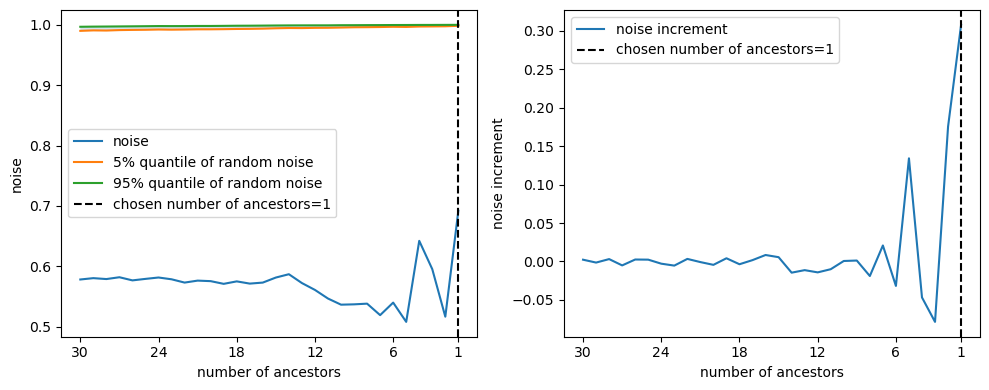

ancestors after pruning:  ['cumulative_persons_vaccinated'] 



inspecting stringency_index
linear kernel (using gamma=4.50e-01)
 n/(n+s)=0.23, Z=0.99
quadratic kernel (using gamma=1.38e-03)
 n/(n+s)=0.70, Z=0.93
stringency_index has ancestors with linear kernel (n/(s+n)=0.23)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated'

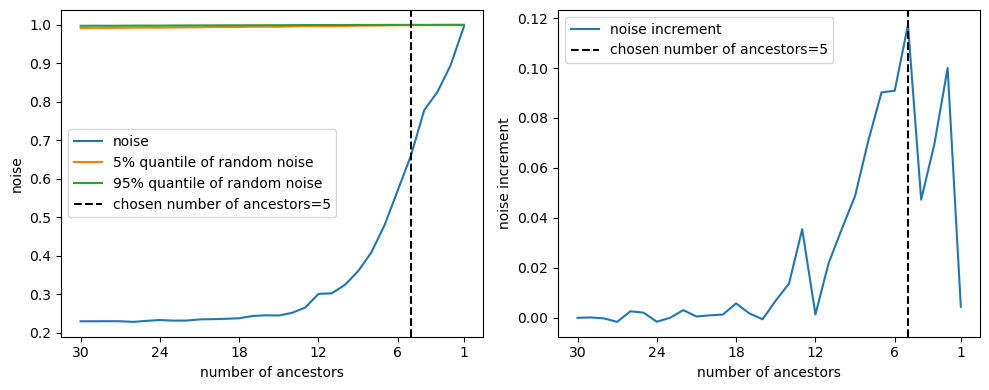

ancestors after pruning:  ['cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement'] 



inspecting new_confirmed
linear kernel (using gamma=8.43e+01)
 n/(n+s)=0.81, Z=0.99
quadratic kernel (using gamma=5.16e+00)
 n/(n+s)=0.74, Z=0.97
new_confirmed has ancestors with quadratic kernel (n/(s+n)=0.74)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_pe

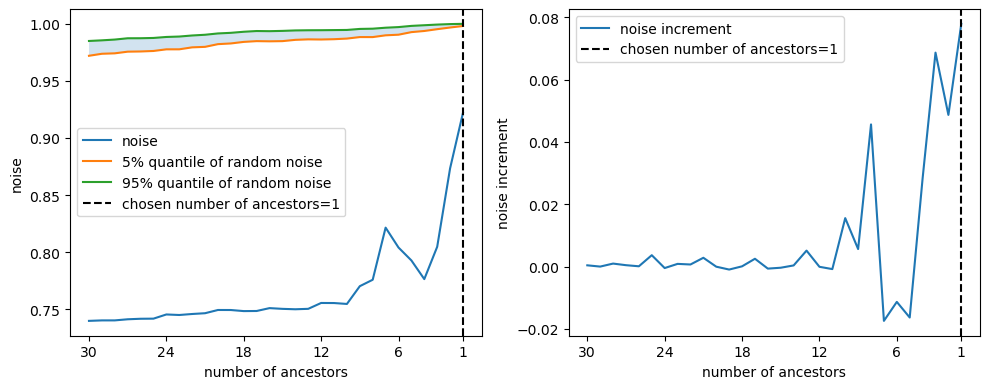

ancestors after pruning:  ['new_hospitalized_patients'] 



inspecting new_deceased
linear kernel (using gamma=8.05e+01)
 n/(n+s)=0.69, Z=0.99
quadratic kernel (using gamma=3.02e+00)
 n/(n+s)=0.84, Z=0.97
new_deceased has ancestors with linear kernel (n/(s+n)=0.69)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated', 

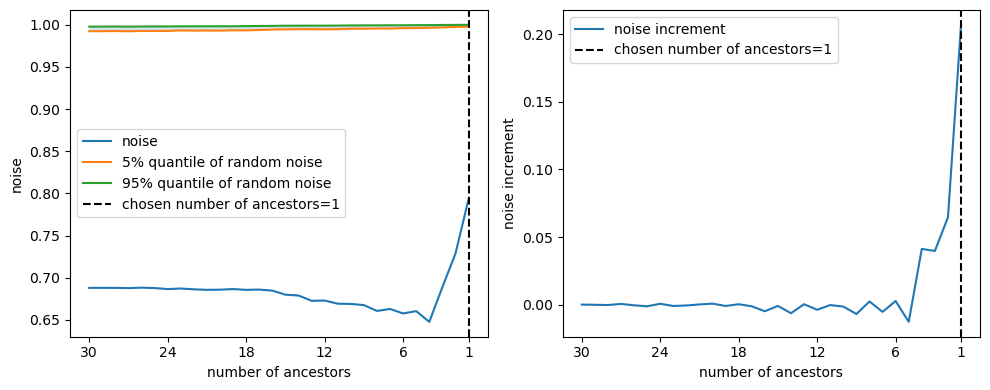

ancestors after pruning:  ['new_intensive_care_patients'] 



inspecting new_recovered
linear kernel (using gamma=5.11e-04)
 n/(n+s)=0.09, Z=1.00
quadratic kernel (using gamma=1.90e-05)
 n/(n+s)=0.40, Z=0.93
new_recovered has ancestors with linear kernel (n/(s+n)=0.09)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cumulative_person

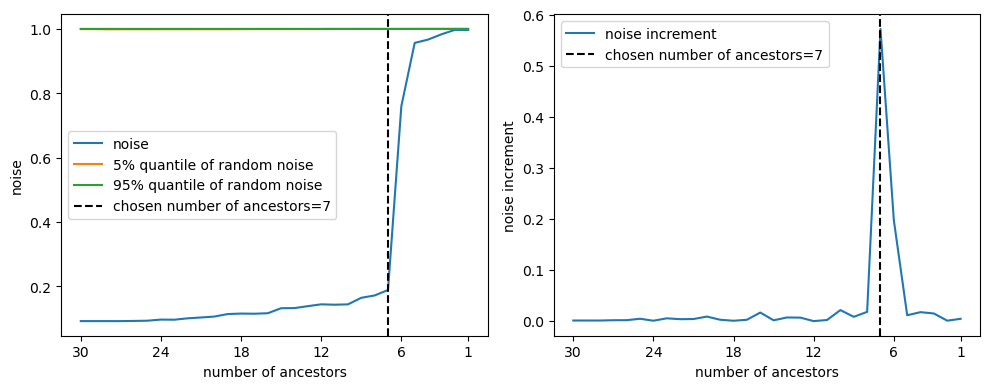

ancestors after pruning:  ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'cumulative_confirmed', 'cumulative_recovered', 'cumulative_persons_vaccinated', 'cumulative_vaccine_doses_administered'] 



inspecting new_tested
linear kernel (using gamma=7.85e+01)
 n/(n+s)=0.75, Z=0.99
quadratic kernel (using gamma=3.69e+00)
 n/(n+s)=0.70, Z=0.97
new_tested has ancestors with quadratic kernel (n/(s+n)=0.70)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'cu

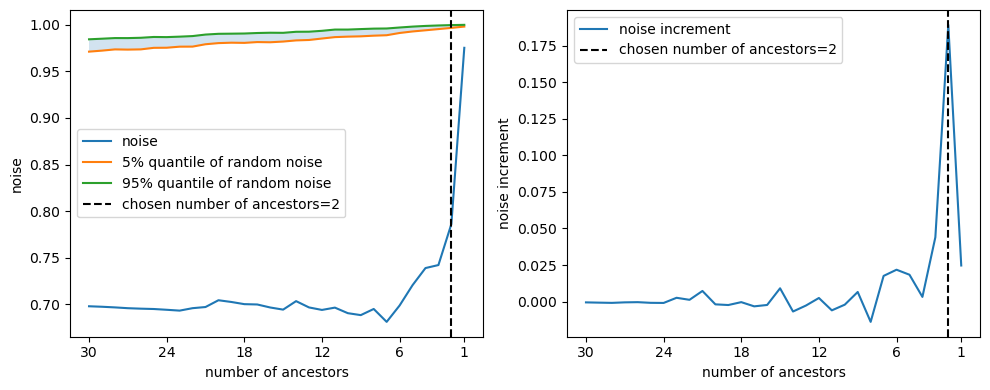

ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients'] 



inspecting cumulative_confirmed
linear kernel (using gamma=4.38e+00)
 n/(n+s)=0.61, Z=0.99
quadratic kernel (using gamma=9.14e-04)
 n/(n+s)=0.36, Z=0.93
cumulative_confirmed has ancestors with quadratic kernel (n/(s+n)=0.36)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cumulat

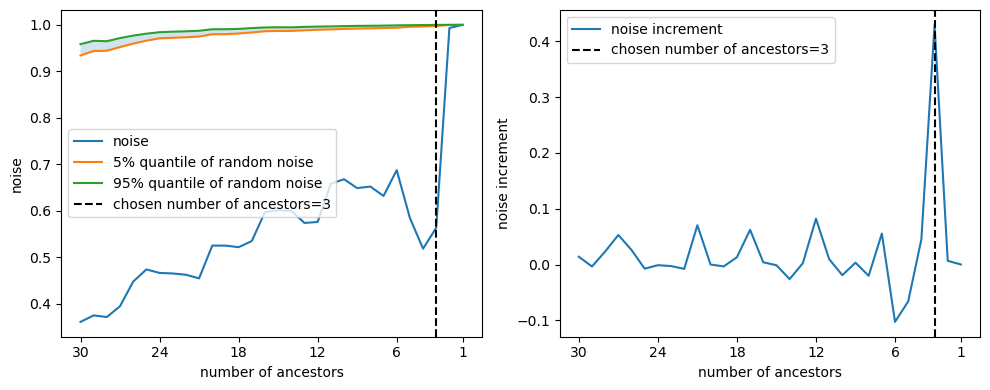

ancestors after pruning:  ['cumulative_hospitalized_patients', 'cumulative_intensive_care_patients', 'vaccination_policy'] 



inspecting cumulative_deceased
linear kernel (using gamma=2.70e+00)
 n/(n+s)=0.49, Z=0.99
quadratic kernel (using gamma=6.42e-02)
 n/(n+s)=0.77, Z=0.95
cumulative_deceased has ancestors with linear kernel (n/(s+n)=0.49)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 

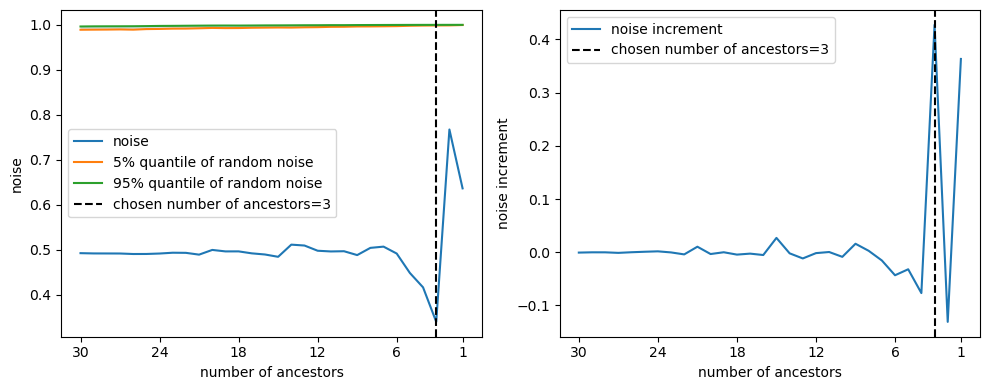

ancestors after pruning:  ['cumulative_intensive_care_patients', 'new_recovered', 'cumulative_confirmed'] 



inspecting cumulative_recovered
linear kernel (using gamma=4.26e-01)
 n/(n+s)=0.62, Z=0.99
quadratic kernel (using gamma=4.07e-04)
 n/(n+s)=0.52, Z=0.93
cumulative_recovered has ancestors with quadratic kernel (n/(s+n)=0.52)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_deceased', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_ful

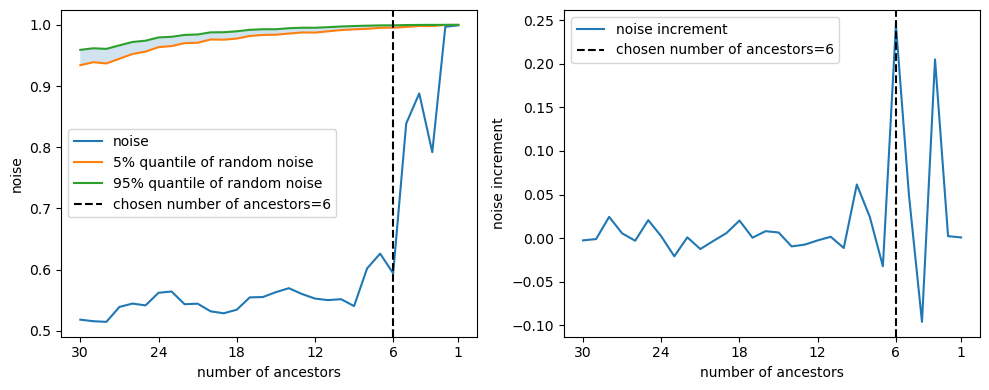

ancestors after pruning:  ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'public_transport_closing', 'income_support', 'cumulative_tested'] 



inspecting cumulative_tested
linear kernel (using gamma=2.69e-01)
 n/(n+s)=0.48, Z=0.99
quadratic kernel (using gamma=1.43e-04)
 n/(n+s)=0.62, Z=0.94
cumulative_tested has ancestors with linear kernel (n/(s+n)=0.48)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulativ

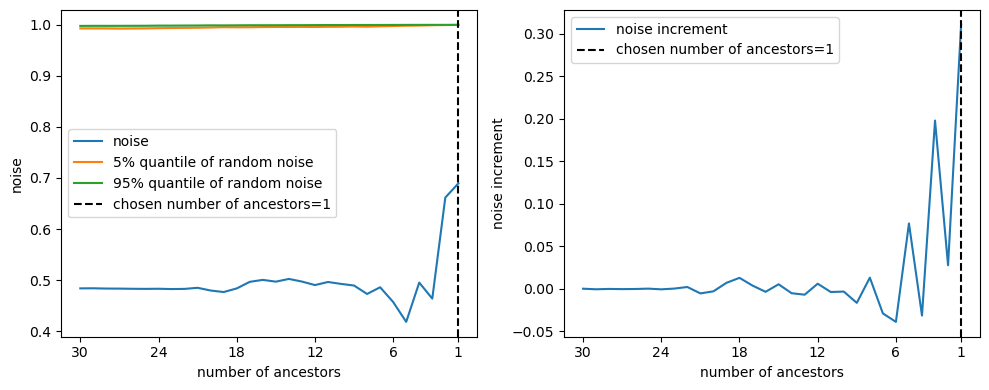

ancestors after pruning:  ['cumulative_recovered'] 



inspecting new_persons_vaccinated
gamma too small for set tolerance(5.02e-26), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(5.92e-16), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=0.92
new_persons_vaccinated has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'canc

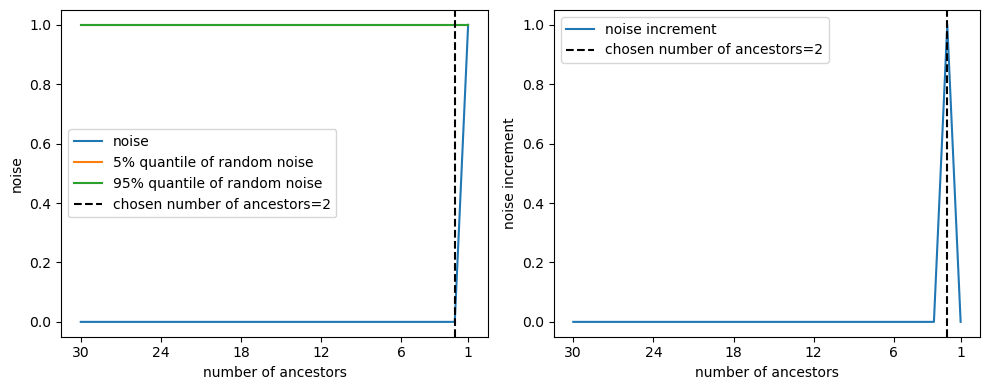

ancestors after pruning:  ['new_persons_fully_vaccinated', 'new_vaccine_doses_administered'] 



inspecting cumulative_persons_vaccinated
gamma too small for set tolerance(6.55e-23), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(5.30e-12), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.02, Z=0.92
cumulative_persons_vaccinated has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care

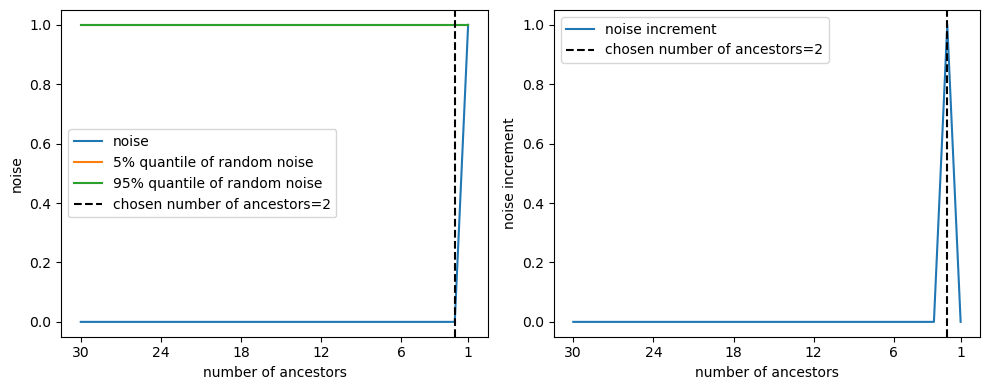

ancestors after pruning:  ['cumulative_persons_fully_vaccinated', 'cumulative_vaccine_doses_administered'] 



inspecting new_persons_fully_vaccinated
gamma too small for set tolerance(3.26e-26), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(3.14e-16), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=0.92
new_persons_fully_vaccinated has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_in

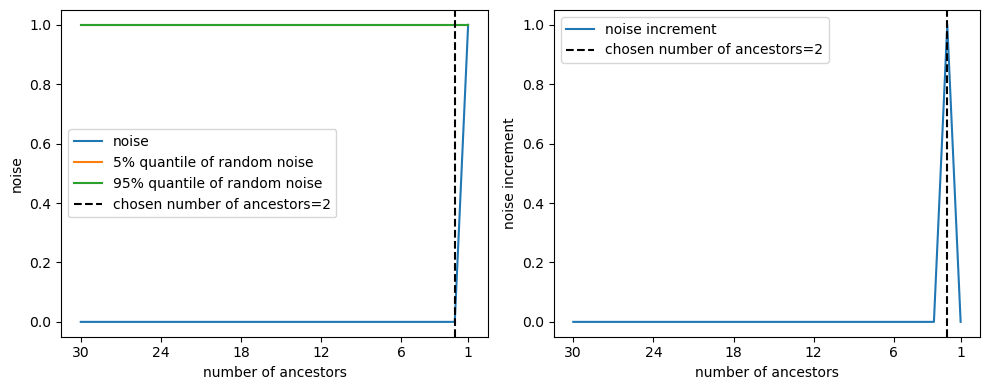

ancestors after pruning:  ['new_persons_vaccinated', 'new_vaccine_doses_administered'] 



inspecting cumulative_persons_fully_vaccinated
gamma too small for set tolerance(1.79e-22), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(1.64e-11), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.02, Z=0.92
cumulative_persons_fully_vaccinated has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensiv

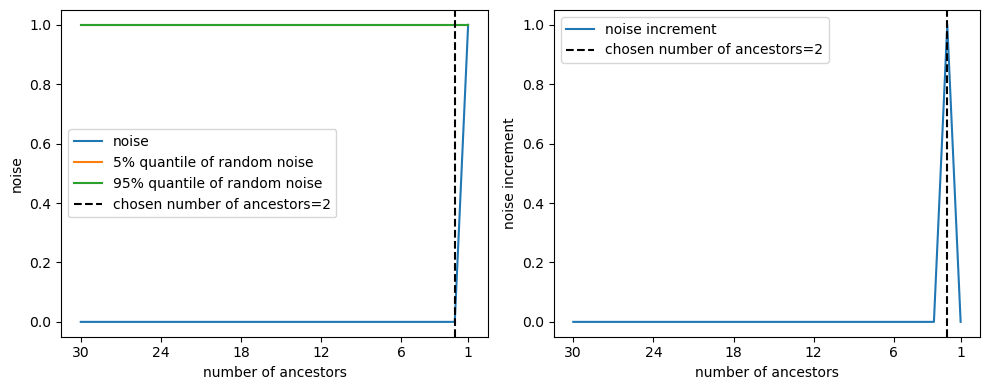

ancestors after pruning:  ['cumulative_persons_vaccinated', 'cumulative_vaccine_doses_administered'] 



inspecting new_vaccine_doses_administered
gamma too small for set tolerance(1.15e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(4.84e-18), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=0.92
new_vaccine_doses_administered has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_clo

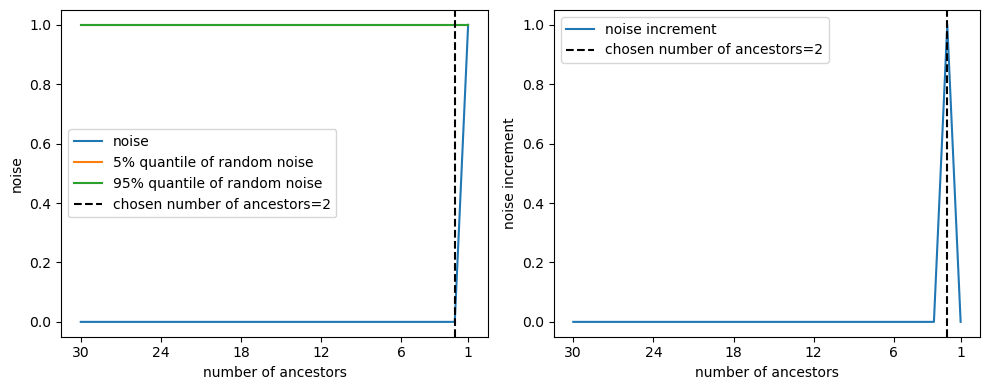

ancestors after pruning:  ['new_persons_vaccinated', 'new_persons_fully_vaccinated'] 



inspecting cumulative_vaccine_doses_administered
gamma too small for set tolerance(5.58e-26), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(7.54e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=0.92
cumulative_vaccine_doses_administered has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intens

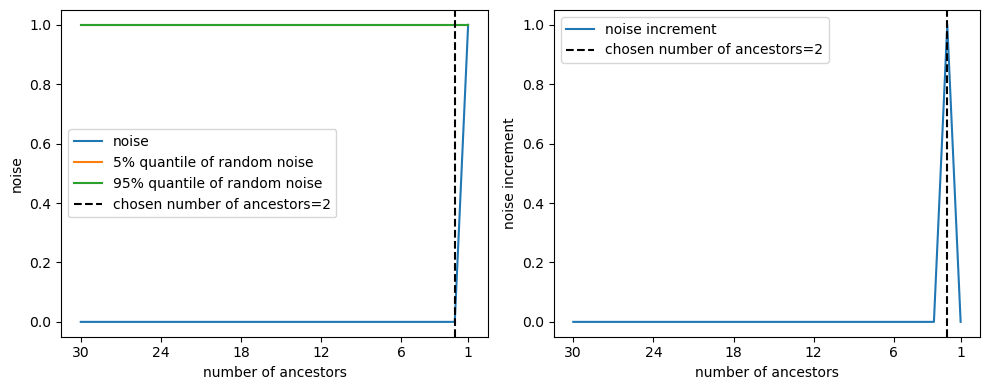

ancestors after pruning:  ['cumulative_persons_vaccinated', 'cumulative_persons_fully_vaccinated'] 





In [7]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(
        node,
        gamma='auto',
    )
    print('\n')

In [10]:
def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.25
    plt.xlim(x_min - x_margin, x_max + x_margin)

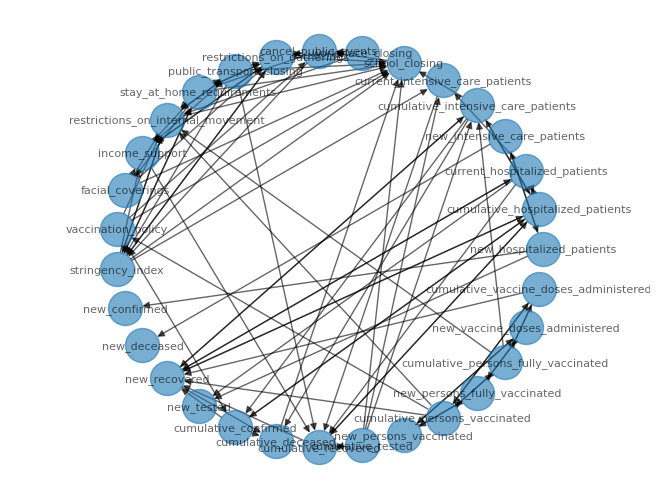

In [10]:
plot_a_network(graph_discovery.G,False)

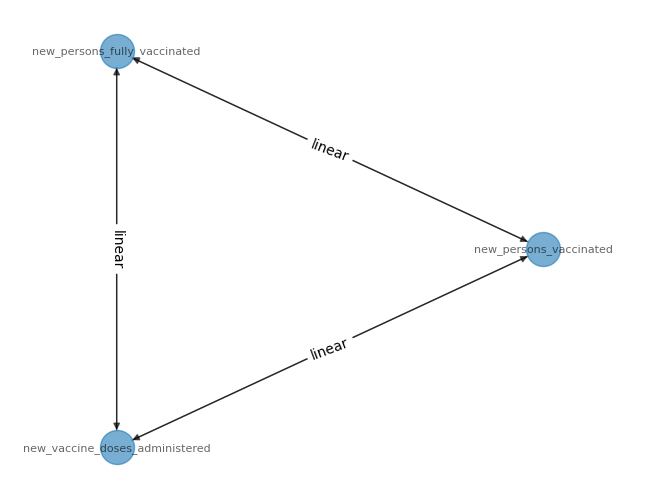

In [11]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'new_persons_fully_vaccinated',undirected=False,radius=2).reverse())

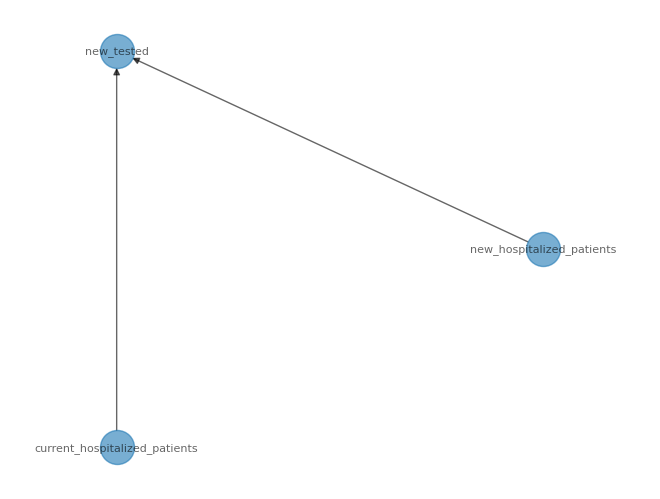

In [12]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'new_tested',undirected=False,radius=1).reverse(),False)

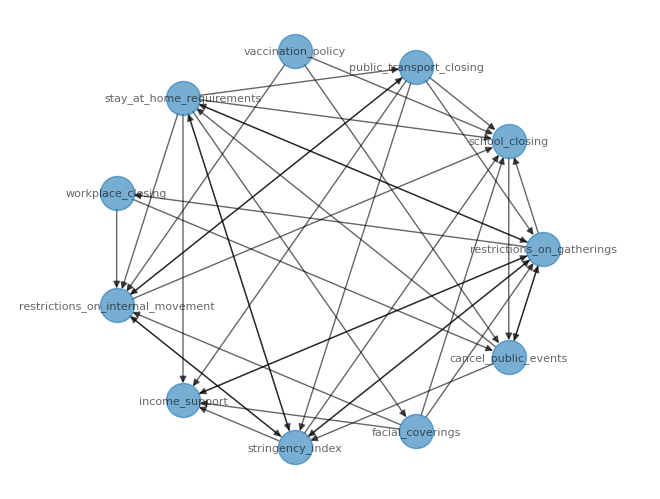

In [13]:
G_gov=graph_discovery.G.subgraph([
       'school_closing', 'workplace_closing', 'cancel_public_events',
       'restrictions_on_gatherings', 'public_transport_closing',
       'stay_at_home_requirements', 'restrictions_on_internal_movement',
       'income_support', 'facial_coverings', 'vaccination_policy',
       'stringency_index'])
plot_a_network(G_gov,False)

# Delete redundant information

In [34]:
reduced_names = ['new_hospitalized_patients',
 'current_hospitalized_patients',
 'stay_at_home_requirements',
 'new_confirmed',
 'new_deceased',
 'new_recovered',
 'new_tested',
 'new_persons_vaccinated']

In [35]:

X_reduced=df[reduced_names].to_numpy()
X_reduced=(X_reduced-onp.mean(X_reduced,axis=0))/onp.std(X_reduced,axis=0)

inspecting new_hospitalized_patients
linear kernel (using gamma=5.87e+01)
 n/(n+s)=0.54, Z=0.99
quadratic kernel (using gamma=2.21e+01)
 n/(n+s)=0.51, Z=0.99
gaussian kernel (using gamma=1.79e-02)
 n/(n+s)=0.73, Z=0.83
new_hospitalized_patients has ancestors with quadratic kernel (n/(s+n)=0.51)
ancestors : ['current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'new_persons_vaccinated']
 n/(n+s)=0.50, Z=0.99
ancestors : ['current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested']
 n/(n+s)=0.52, Z=0.99
ancestors : ['current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_tested']
 n/(n+s)=0.54, Z=0.99
ancestors : ['current_hospitalized_patients', 'new_deceased', 'new_tested']
 n/(n+s)=0.54, Z=0.99
ancestors : ['current_hospitalized_patients', 'new_deceased']
 n/(n+s)=0.73, Z=1.00
ancestors : ['new_deceased']
 n/(n+s)=0.72, Z=1.00


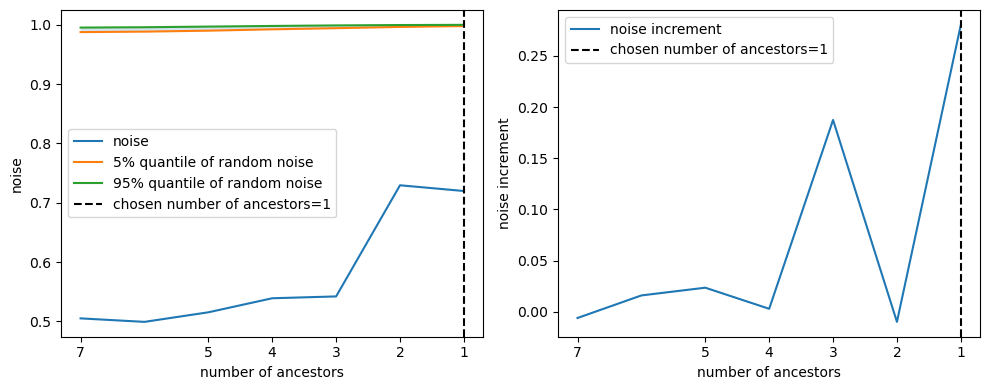

ancestors after pruning:  ['new_deceased'] 



inspecting current_hospitalized_patients
linear kernel (using gamma=6.62e+01)
 n/(n+s)=0.65, Z=0.99
quadratic kernel (using gamma=2.70e+01)
 n/(n+s)=0.53, Z=0.99
gaussian kernel (using gamma=2.59e-02)
 n/(n+s)=0.53, Z=0.82
current_hospitalized_patients has ancestors with quadratic kernel (n/(s+n)=0.53)
ancestors : ['new_hospitalized_patients', 'stay_at_home_requirements', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_persons_vaccinated']
 n/(n+s)=0.57, Z=0.99
ancestors : ['new_hospitalized_patients', 'stay_at_home_requirements', 'new_confirmed', 'new_deceased', 'new_recovered']
 n/(n+s)=0.59, Z=0.99
ancestors : ['new_hospitalized_patients', 'stay_at_home_requirements', 'new_deceased', 'new_recovered']
 n/(n+s)=0.63, Z=0.99
ancestors : ['new_hospitalized_patients', 'stay_at_home_requirements', 'new_deceased']
 n/(n+s)=0.72, Z=1.00
ancestors : ['new_hospitalized_patients', 'new_deceased']
 n/(n+s)=0.75, Z=1.00
ancestors : ['new_dece

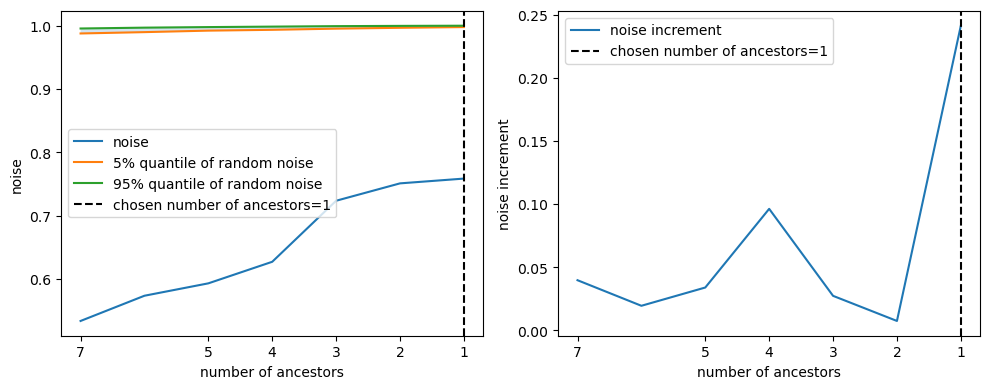

ancestors after pruning:  ['new_deceased'] 



inspecting stay_at_home_requirements
linear kernel (using gamma=6.21e+01)
 n/(n+s)=0.59, Z=0.99
quadratic kernel (using gamma=2.66e+01)
 n/(n+s)=0.48, Z=0.99
gaussian kernel (using gamma=4.88e-02)
 n/(n+s)=0.82, Z=0.81
stay_at_home_requirements has ancestors with quadratic kernel (n/(s+n)=0.48)
ancestors : ['current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'new_persons_vaccinated']
 n/(n+s)=0.48, Z=0.99
ancestors : ['current_hospitalized_patients', 'new_deceased', 'new_recovered', 'new_tested', 'new_persons_vaccinated']
 n/(n+s)=0.48, Z=0.99
ancestors : ['current_hospitalized_patients', 'new_recovered', 'new_tested', 'new_persons_vaccinated']
 n/(n+s)=0.45, Z=0.99
ancestors : ['current_hospitalized_patients', 'new_recovered', 'new_persons_vaccinated']
 n/(n+s)=0.52, Z=0.99
ancestors : ['current_hospitalized_patients', 'new_recovered']
 n/(n+s)=0.62, Z=1.00
ancestors : ['new_recovered']
 n/(n+s

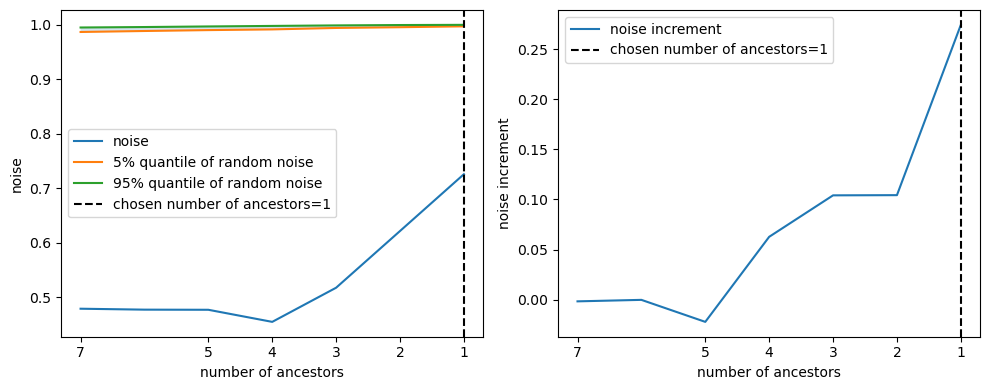

ancestors after pruning:  ['new_recovered'] 



inspecting new_confirmed
linear kernel (using gamma=1.78e+02)
 n/(n+s)=0.83, Z=1.00
quadratic kernel (using gamma=7.34e+01)
 n/(n+s)=0.77, Z=0.99
gaussian kernel (using gamma=2.50e-02)
 n/(n+s)=0.58, Z=0.81
new_confirmed has ancestors with gaussian kernel (n/(s+n)=0.58)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_deceased', 'new_recovered', 'new_tested', 'new_persons_vaccinated']
 n/(n+s)=0.58, Z=0.82
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_deceased', 'new_recovered', 'new_tested']
 n/(n+s)=0.60, Z=0.85
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_recovered', 'new_tested']
 n/(n+s)=0.69, Z=0.88
ancestors : ['current_hospitalized_patients', 'new_recovered', 'new_tested']
 n/(n+s)=0.83, Z=0.92
ancestors : ['new_recovered', 'new_tested']
 n/(n+s)=0.92, Z=0.98
ancestors : ['new_recovered']
 n/(n+s)=0.97, Z=1.00


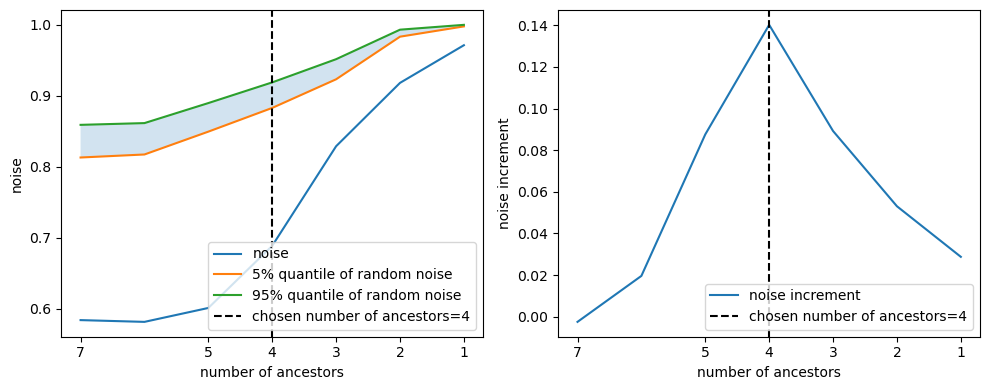

ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_recovered', 'new_tested'] 



inspecting new_deceased
linear kernel (using gamma=9.73e+01)
 n/(n+s)=0.69, Z=1.00
quadratic kernel (using gamma=7.13e+01)
 n/(n+s)=0.66, Z=0.99
gaussian kernel (using gamma=1.51e-02)
 n/(n+s)=0.74, Z=0.83
new_deceased has ancestors with quadratic kernel (n/(s+n)=0.66)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'stay_at_home_requirements', 'new_confirmed', 'new_recovered', 'new_tested']
 n/(n+s)=0.66, Z=0.99
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'stay_at_home_requirements', 'new_recovered', 'new_tested']
 n/(n+s)=0.66, Z=0.99
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'stay_at_home_requirements', 'new_recovered']
 n/(n+s)=0.67, Z=0.99
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_recovered']
 n/(n+s)=0.67, Z=0.99
ancestors : ['new_

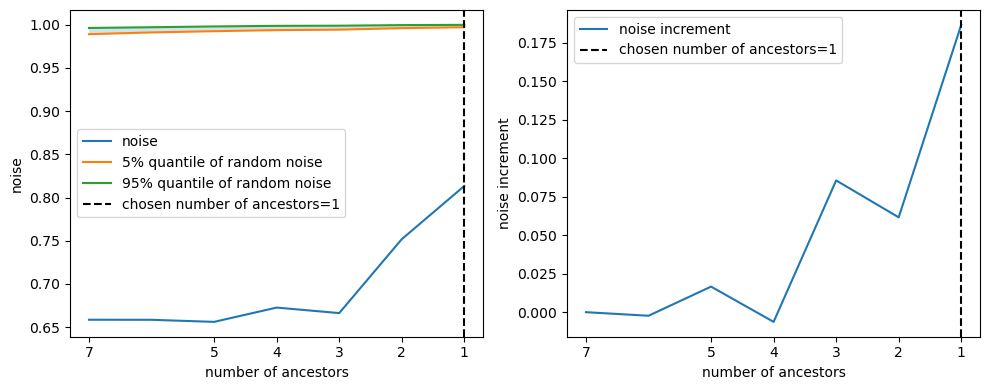

ancestors after pruning:  ['new_hospitalized_patients'] 



inspecting new_recovered
linear kernel (using gamma=1.15e+02)
 n/(n+s)=0.81, Z=1.00
quadratic kernel (using gamma=2.88e+01)
 n/(n+s)=0.53, Z=0.99
gaussian kernel (using gamma=3.41e-02)
 n/(n+s)=0.68, Z=0.81
new_recovered has ancestors with quadratic kernel (n/(s+n)=0.53)
ancestors : ['current_hospitalized_patients', 'stay_at_home_requirements', 'new_confirmed', 'new_deceased', 'new_tested', 'new_persons_vaccinated']
 n/(n+s)=0.54, Z=0.99
ancestors : ['current_hospitalized_patients', 'stay_at_home_requirements', 'new_deceased', 'new_tested', 'new_persons_vaccinated']
 n/(n+s)=0.54, Z=0.99
ancestors : ['current_hospitalized_patients', 'stay_at_home_requirements', 'new_deceased', 'new_persons_vaccinated']
 n/(n+s)=0.56, Z=0.99
ancestors : ['current_hospitalized_patients', 'stay_at_home_requirements', 'new_persons_vaccinated']
 n/(n+s)=0.56, Z=0.99
ancestors : ['current_hospitalized_patients', 'stay_at_home_requirements']
 n/(n+s)

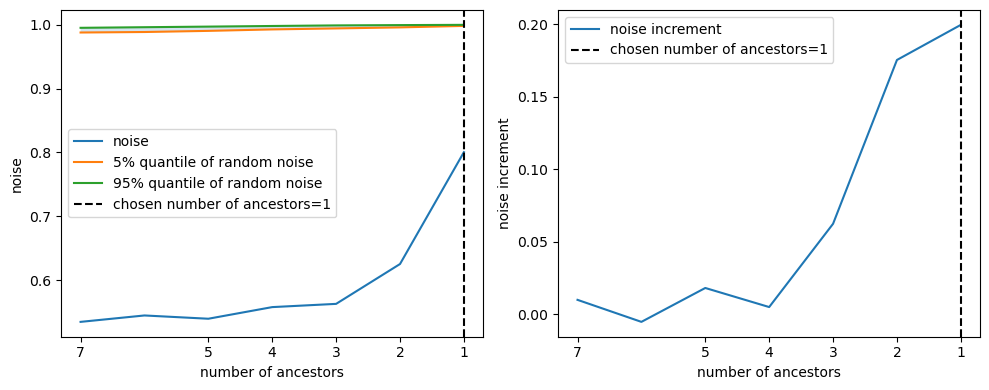

ancestors after pruning:  ['stay_at_home_requirements'] 



inspecting new_tested
linear kernel (using gamma=1.72e+02)
 n/(n+s)=0.89, Z=1.00
quadratic kernel (using gamma=7.01e+01)
 n/(n+s)=0.82, Z=0.99
gaussian kernel (using gamma=1.50e-02)
 n/(n+s)=0.76, Z=0.82
new_tested has ancestors with gaussian kernel (n/(s+n)=0.76)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_persons_vaccinated']
 n/(n+s)=0.76, Z=0.83
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_confirmed', 'new_recovered', 'new_persons_vaccinated']
 n/(n+s)=0.84, Z=0.86
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_recovered', 'new_persons_vaccinated']
 n/(n+s)=0.88, Z=0.88
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_persons_vaccinated']
 n/(n+s)=0.91, Z=0.92
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients']
 n/(n+s

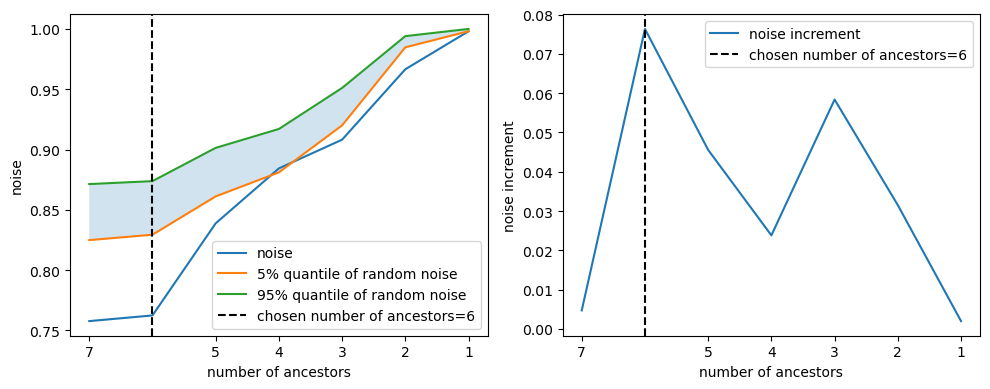

ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_persons_vaccinated'] 



inspecting new_persons_vaccinated
linear kernel (using gamma=3.03e+02)
 n/(n+s)=0.95, Z=1.00
quadratic kernel (using gamma=6.98e+01)
 n/(n+s)=0.85, Z=0.99
gaussian kernel (using gamma=1.50e-02)
 n/(n+s)=0.79, Z=0.83
new_persons_vaccinated has ancestors with gaussian kernel (n/(s+n)=0.79)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested']
 n/(n+s)=0.79, Z=0.84
ancestors : ['current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested']
 n/(n+s)=0.82, Z=0.86
ancestors : ['current_hospitalized_patients', 'new_confirmed', 'new_recovered', 'new_tested']
 n/(n+s)=0.86, Z=0.90
ancestors : ['current_hospitalized_patients', 'new_recovered', 'new_tested']
 n/(n+s)=0.89, Z=0.92
ancestors : ['current_hospitalized

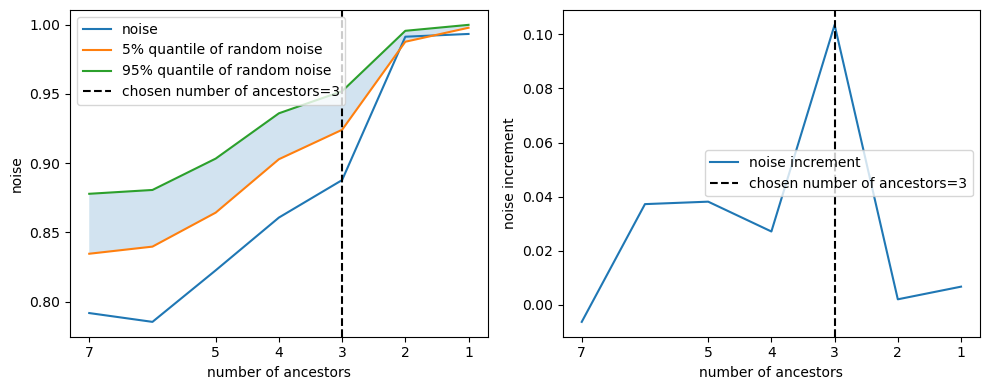

ancestors after pruning:  ['current_hospitalized_patients', 'new_recovered', 'new_tested'] 





In [36]:
modes_reduced=ModeContainer.make_container(
    X_reduced.T,
    onp.array(reduced_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
    {'name':'gaussian','beta':0.1,'type':'combinatorial','interpolatory':True,'default':True,'l':1},
)

graph_discovery_reduced=GraphDiscoveryNew(X_reduced.T,onp.array(reduced_names),modes_reduced)
for node in graph_discovery_reduced.names:
    print(f'inspecting {node}')
    graph_discovery_reduced.find_ancestors(
        node,
        gamma='auto',
    )
    print('\n')

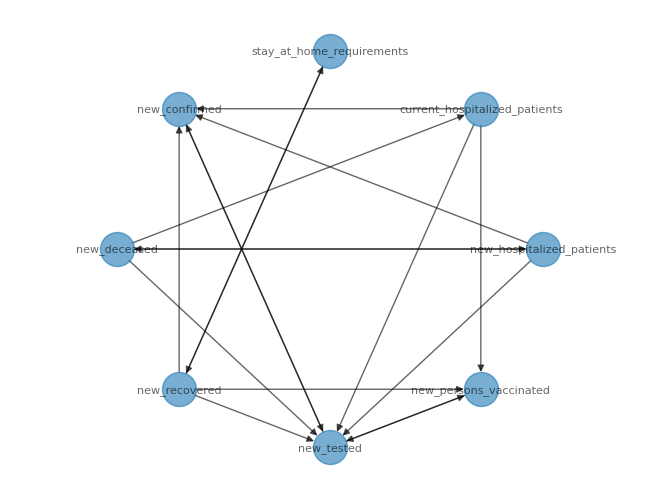

In [38]:
plot_a_network(graph_discovery_reduced.G,False)